**Automatic ML - DS_C8_SC1_T4**

---


In [1]:
import pandas as pd

1. Leer en un dataframe, `apps`, el contenido del archivo GooglePlayStore.csv, que almacena información de las aplicaciones móviles para los dispositivos con sistema operativo Android. 

In [2]:
apps = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLG/AutoML/DS_C8_SC1_T4_Pruebate/GooglePlayStore.csv")
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


2.	Borra todos los registros que contengan valores faltantes.

In [5]:
apps.dropna(inplace=True)
apps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

3.	Inicia una instancia de H2O y convierte el dataframe de Pandas a H2OFrame haciendo que la columna `Current Ver` sea interpretada como categórica (por defecto se lee como time) como se indica:
 
`appsH2O = h2o.H2OFrame(apps, column_types={'Current Ver':'factor'})`


In [3]:
!pip install -U h2o
import h2o
from h2o.automl import H2OAutoML

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplmqr72q0
  JVM stdout: /tmp/tmplmqr72q0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplmqr72q0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_zhnzhg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [7]:
appsH2O = h2o.H2OFrame(apps, column_types={'Current Ver':'factor'})

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


4. Divide `appsH2O` en conjuntos de entrenamiento y prueba, considerando una distribución 70:30 e indica que la variable de respuesta o salida será `Rating`

In [22]:
train, test = appsH2O.split_frame(ratios=[0.70], destination_frames=['train', 'test'])

In [23]:
y = 'Rating'
X = list(appsH2O.columns)
X.remove(y)

5.	Configura el AutoML considerando 10 pliegues para la validación cruzada y 3 minutos máximos para la generación de modelos. Ejecuta el entrenamiento, indicando que la tabla de clasificación se construirá usando el conjunto de prueba. 

In [28]:
aml = H2OAutoML(max_runtime_secs=180, nfolds=10)
aml.train(x = X, y = y, training_frame = train, leaderboard_frame=test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_3_20220326_00803

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.1136850224246155
RMSE: 0.3371720961536045
MAE: 0.23825167298566818
RMSLE: 0.07852993956883593
R^2: 0.5801724921543047
Mean Residual Deviance: 0.1136850224246155
Null degrees of freedom: 6560
Residual degrees of freedom: 6556
Null deviance: 1776.6521206580842
Residual deviance: 745.8874321279023
AIC: 4365.574189461943

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.23114341842215966
RMSE: 0.4807737705222277
MAE: 0.3269940519575751
RMSLE: 0.10829767693719806
R^2: 0.14641029009874273
Mean Residual Deviance: 0.23114341842215966
Null degrees of freedom: 6560
Residual degrees of freedom: 6556
Null deviance: 1777.28758

6.	Imprime la tabla de clasificación. ¿Qué tan buenos fueron los modelos construidos en datos no vistos? 

In [29]:
aml.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_1_AutoML_3_20220326_00803,0.210937,0.459279,0.210937,0.313599,0.101598
StackedEnsemble_BestOfFamily_2_AutoML_3_20220326_00803,0.214103,0.462712,0.214103,0.318002,0.102236
StackedEnsemble_BestOfFamily_1_AutoML_3_20220326_00803,0.217688,0.46657,0.217688,0.316461,0.102904
GBM_2_AutoML_3_20220326_00803,0.221099,0.470212,0.221099,0.317266,0.103648
XGBoost_3_AutoML_3_20220326_00803,0.221108,0.470221,0.221108,0.326709,0.103436
GBM_3_AutoML_3_20220326_00803,0.222069,0.471242,0.222069,0.316209,0.103762
XGBoost_2_AutoML_3_20220326_00803,0.223535,0.472795,0.223535,0.317388,0.103693
GBM_4_AutoML_3_20220326_00803,0.223834,0.473111,0.223834,0.313179,0.104127
XGBoost_1_AutoML_3_20220326_00803,0.225837,0.475223,0.225837,0.317284,0.104253
GLM_1_AutoML_3_20220326_00803,0.226355,0.475768,0.226355,0.330136,0.104474


7. Obtén el reporte de importancia de variables y su versión gráfica a través de un mapa de calor. ¿Cuáles son las características que más aportan a la predicción en los modelos graficados? 

In [26]:
aml.varimp()

,GLM_1,DeepLearning_1,XGBoost_3,XGBoost_2,XGBoost_grid_1_model_1,XGBoost_1,XRT_1,GBM_3,DRF_1,GBM_grid_1_model_1,GBM_1,GBM_5,GBM_2,GBM_4
Size,0.065779,0.032124,0.076117,0.129736,0.028740,0.085639,0.343259,0.292516,0.332475,0.431092,0.428977,0.365368,0.359087,0.386706
App,0.490970,0.644873,0.019702,0.000000,0.000000,0.000000,0.035394,0.023848,0.051243,0.011338,0.005161,0.007769,0.028190,0.029967
Reviews,0.000099,0.000162,0.296165,0.313250,0.413448,0.403872,0.034846,0.059372,0.028441,0.064797,0.076521,0.064174,0.057222,0.053950
Current Ver,0.210705,0.204060,0.045858,0.063498,0.046111,0.060185,0.041719,0.049649,0.057414,0.014042,0.004902,0.017560,0.019122,0.027664
Last Updated,0.175430,0.102337,0.116853,0.054475,0.022798,0.034234,0.216415,0.170651,0.131360,0.150750,0.180744,0.155286,0.174384,0.140430
Content Rating,0.000449,0.000466,0.007501,0.019589,0.007676,0.022172,0.007929,0.001748,0.007424,0.000260,0.000339,0.001506,0.000902,0.001258
Type,0.001394,0.000162,0.010173,0.009830,0.017997,0.004551,0.001493,0.002474,0.004984,0.001527,0.003294,0.004950,0.003732,0.002494
Price,0.000095,0.000097,0.032777,0.026171,0.032822,0.032140,0.001762,0.000261,0.002442,0.001402,0.000000,0.001319,0.000000,0.000458
Android Ver,0.008196,0.002588,0.090042,0.097655,0.103811,0.084897,0.066048,0.064088,0.074385,0.054918,0.040519,0.065941,0.049712,0.088975
Category,0.009493,0.002621,0.049769,0.048342,0.058684,0.044568,0.064921,0.042437,0.059380,0.074796,0.036147,0.044991,0.049062,0.063321


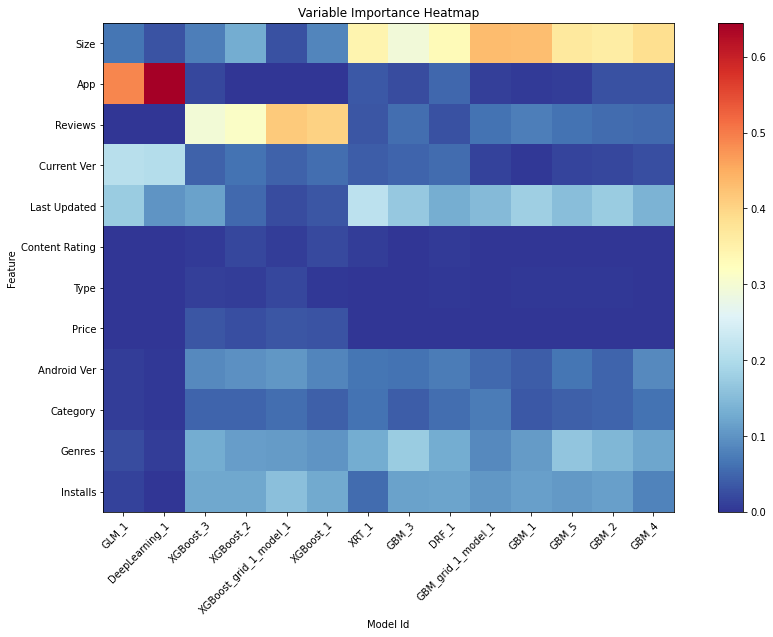

In [27]:
aml.varimp_heatmap()

8. Utiliza la función `explain()` para generar las gráficas de análisis residual, dependencias parciales y expectativa condicional del mejor modelo 



# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

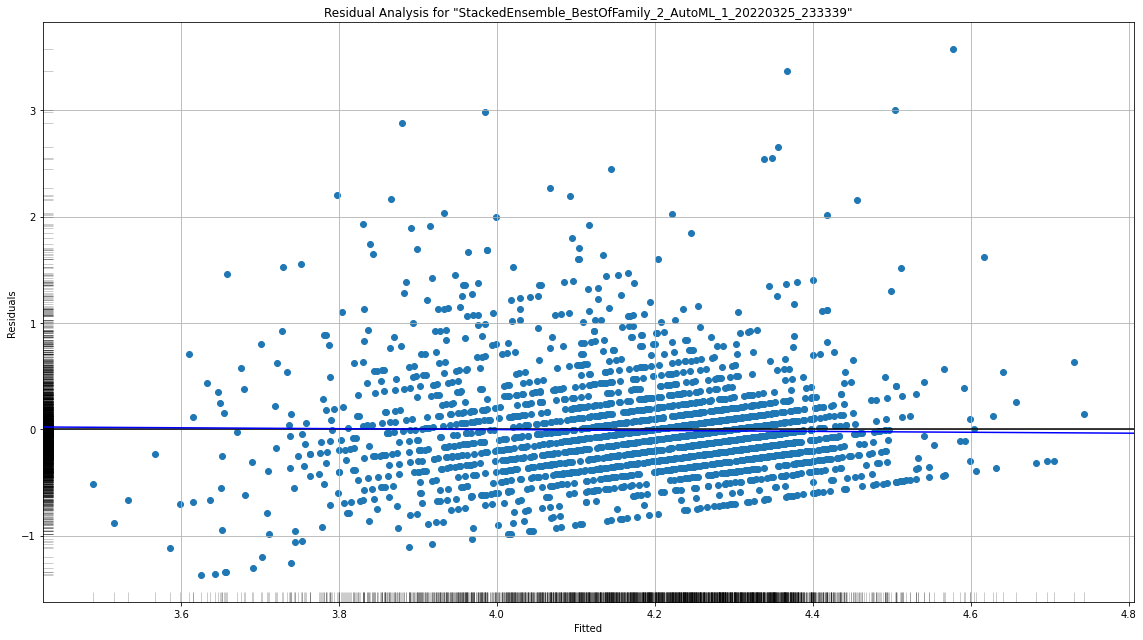

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

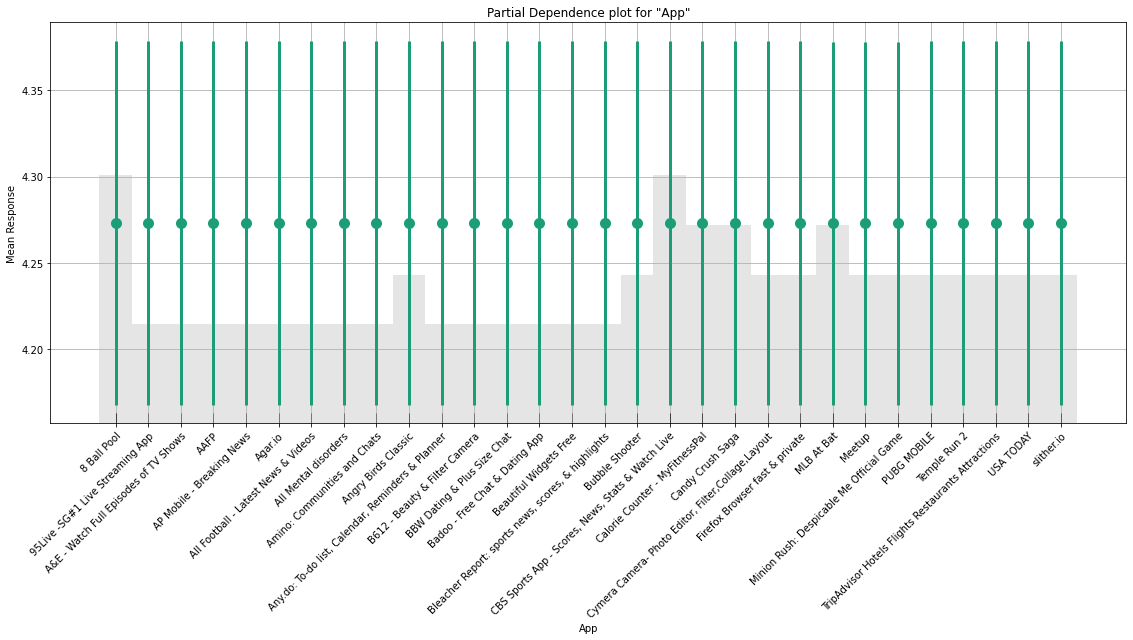

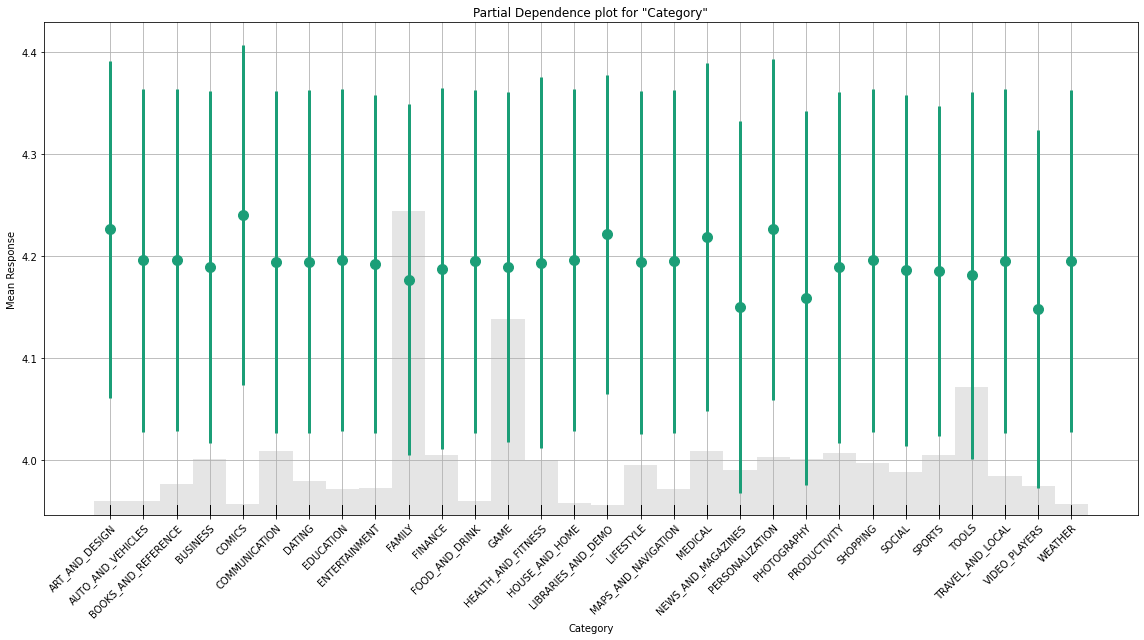

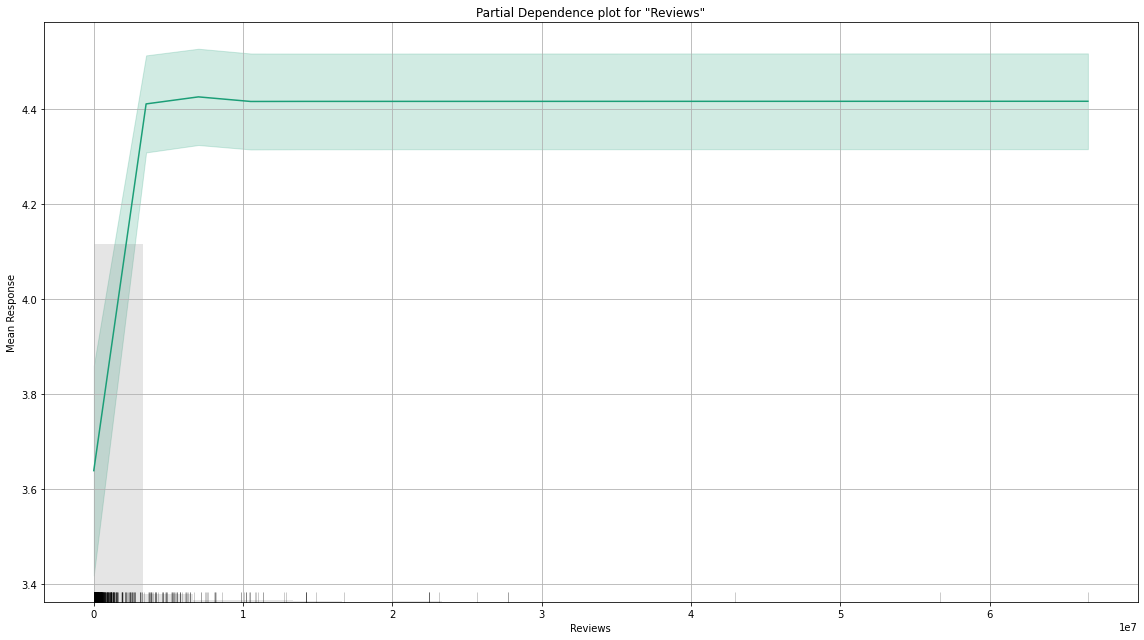

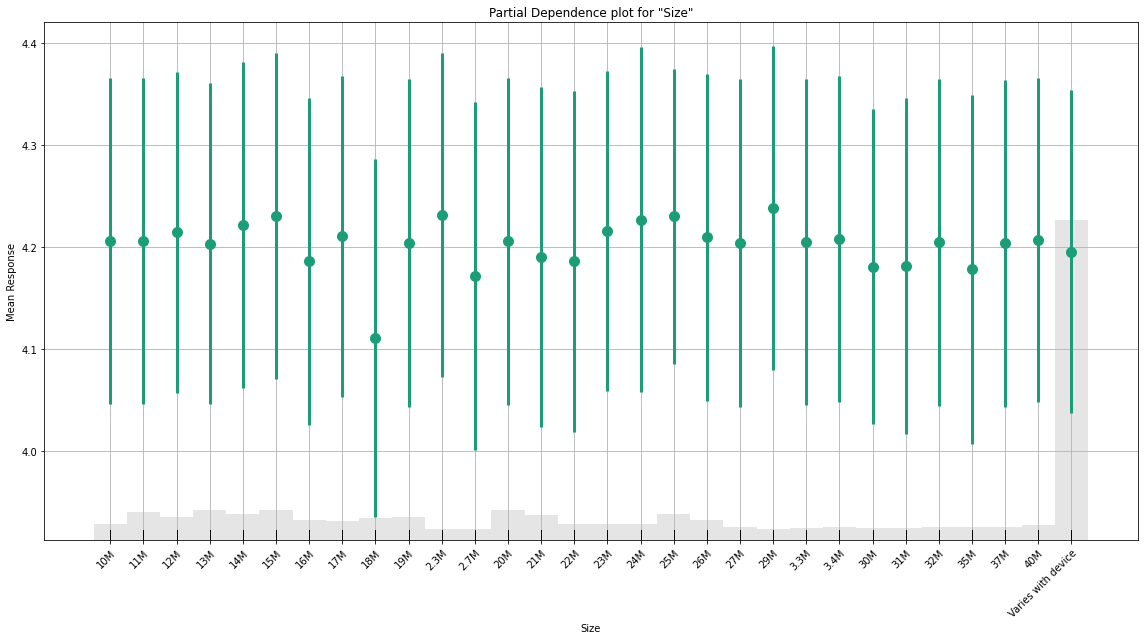

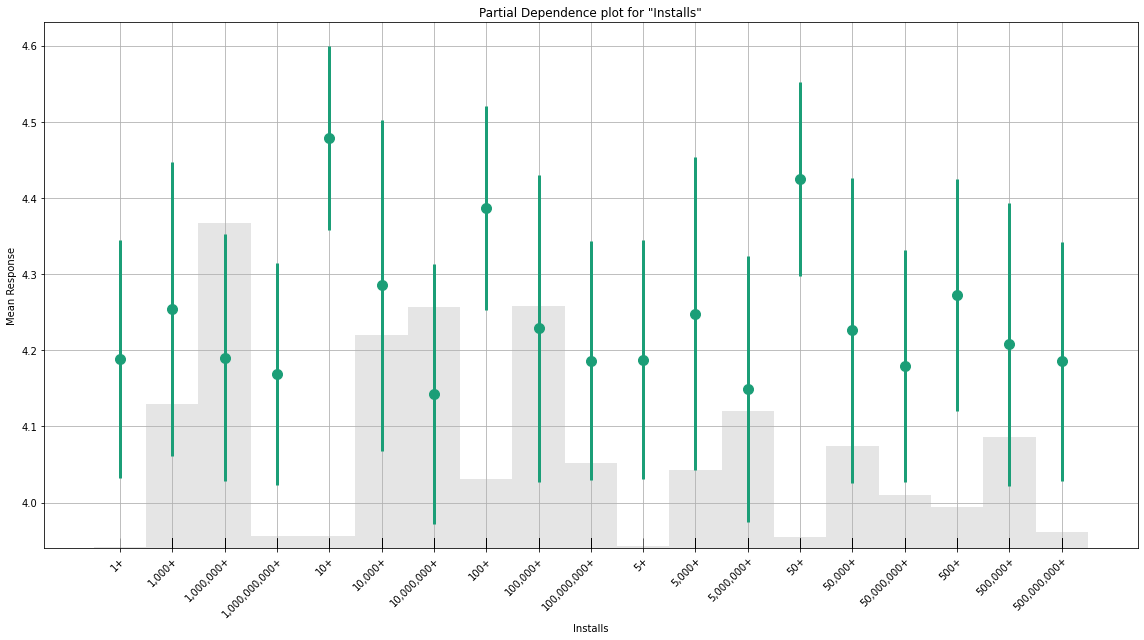

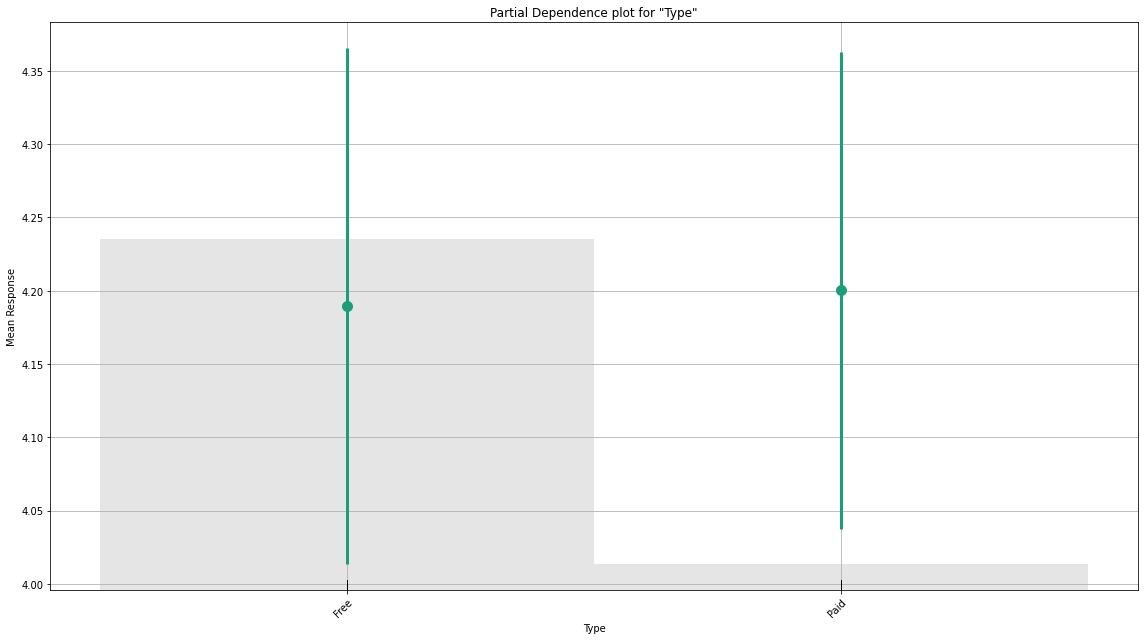

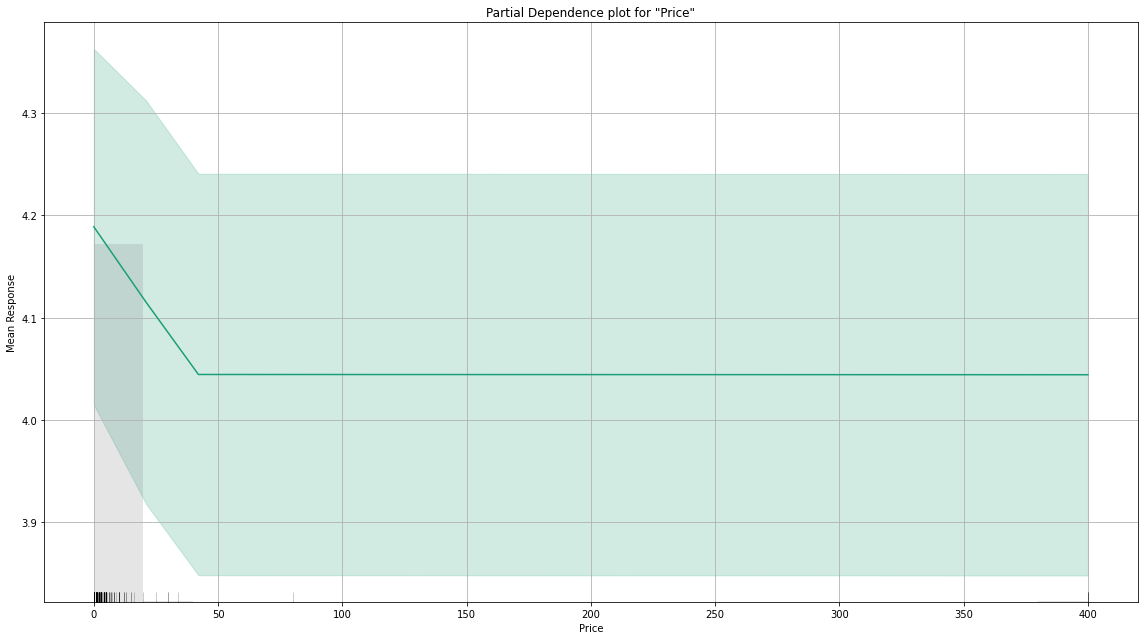

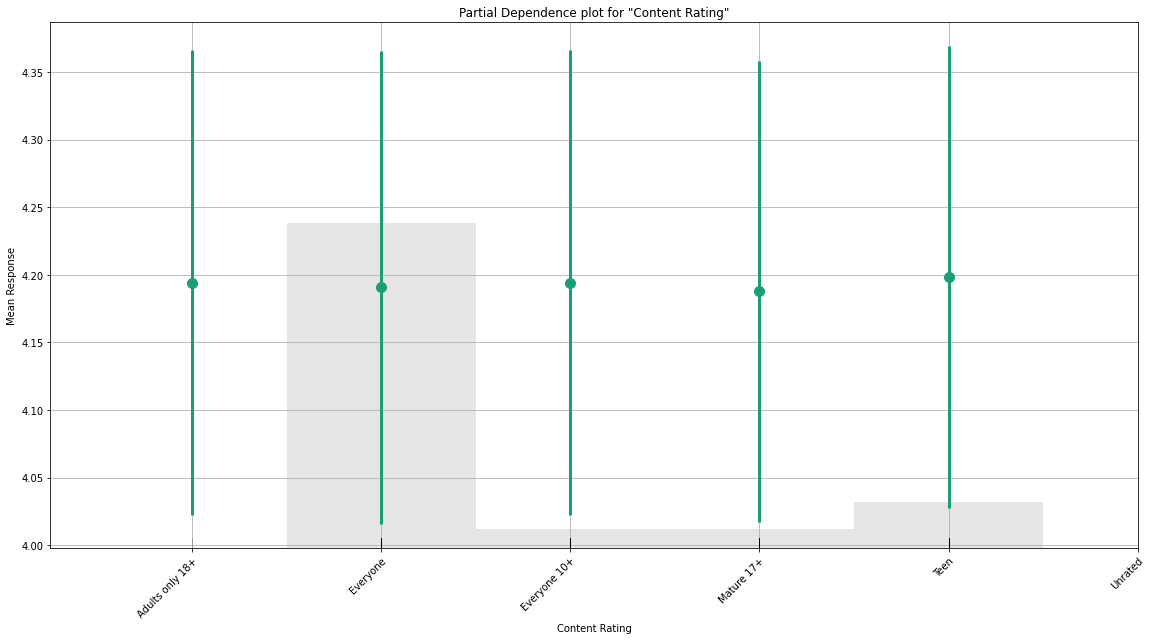

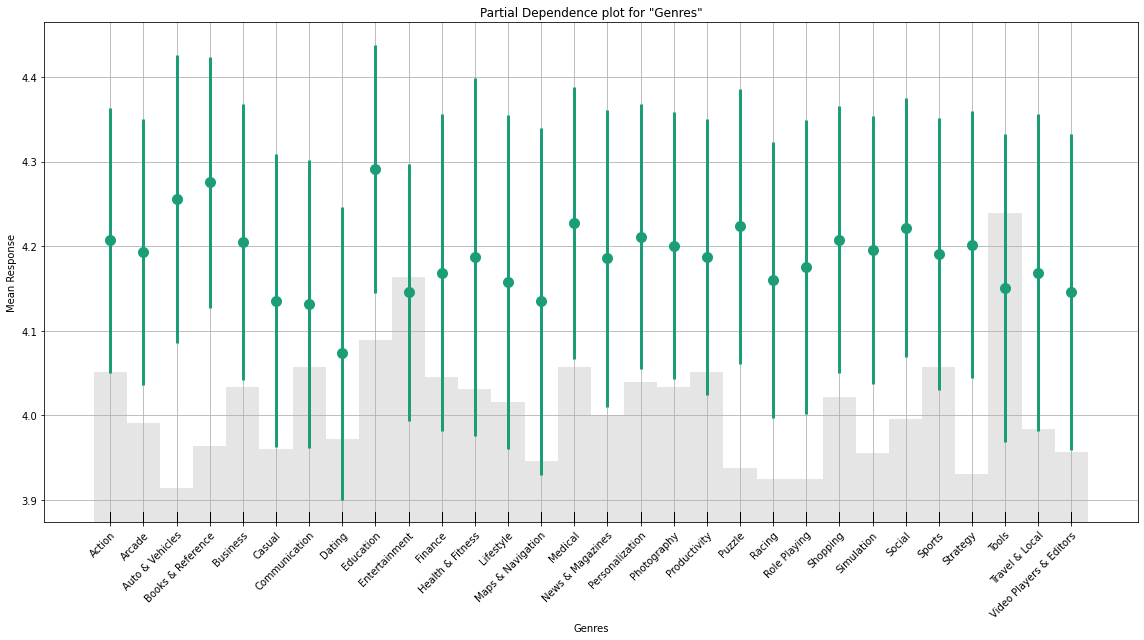

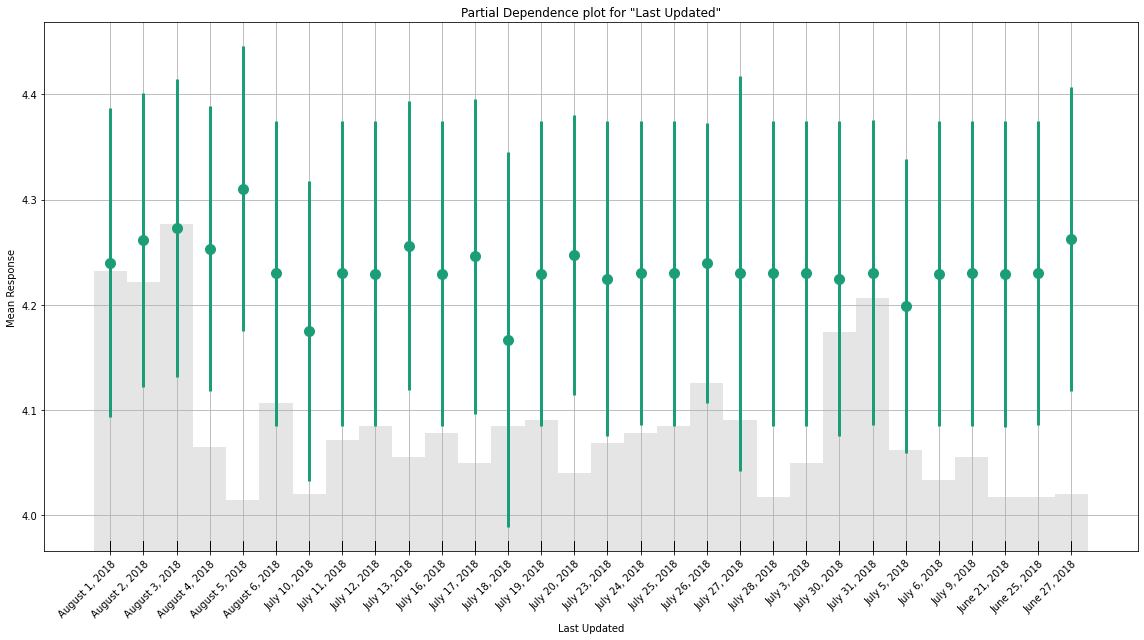

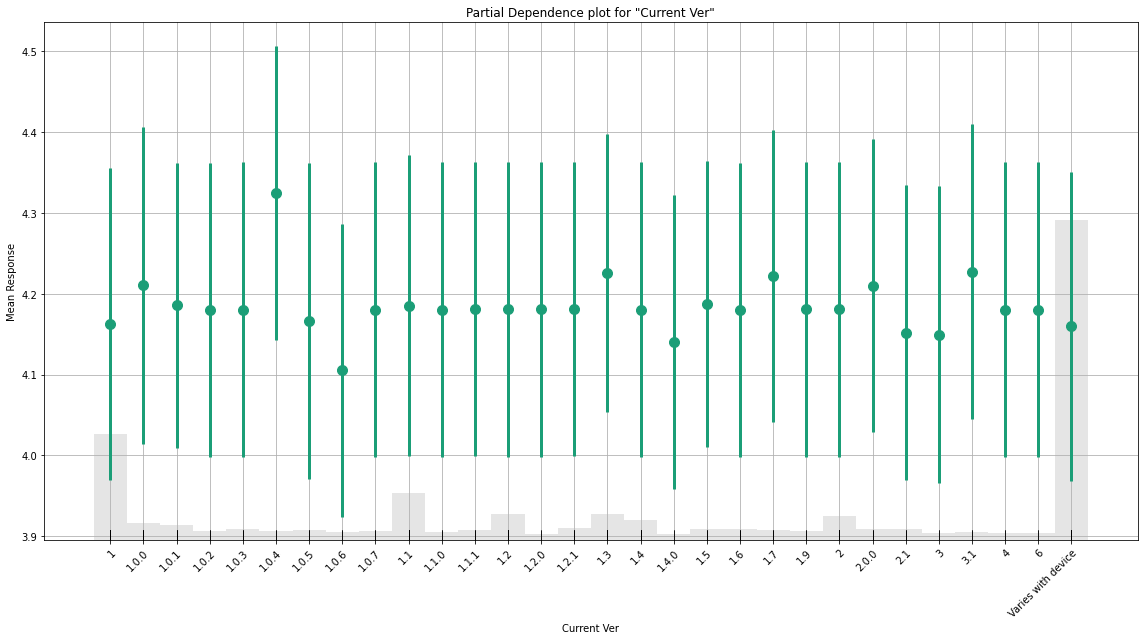

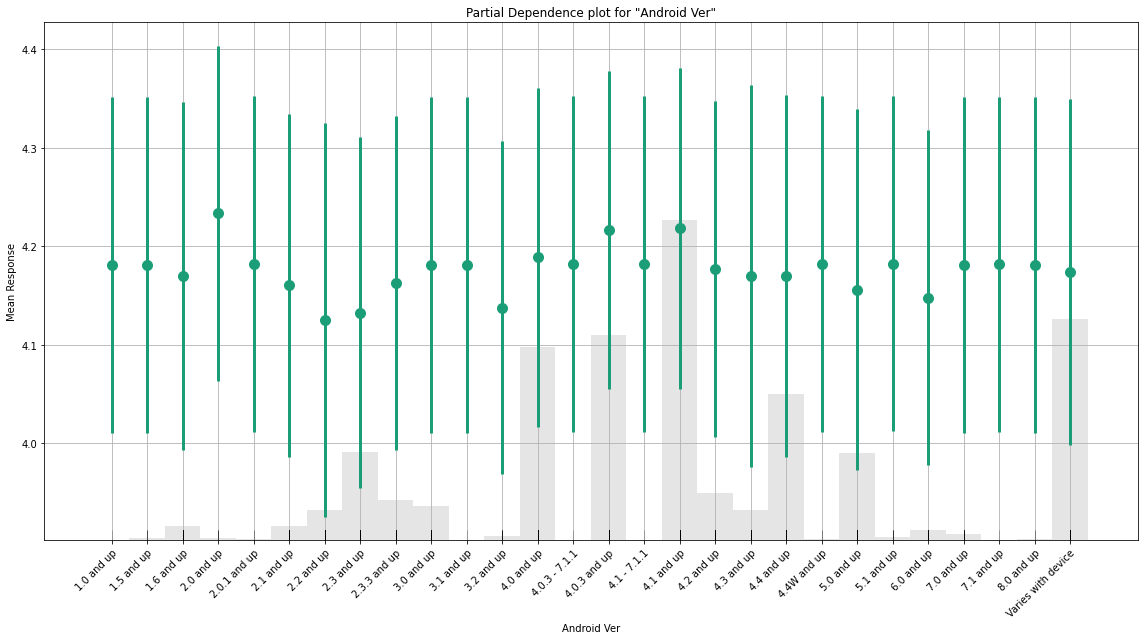

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

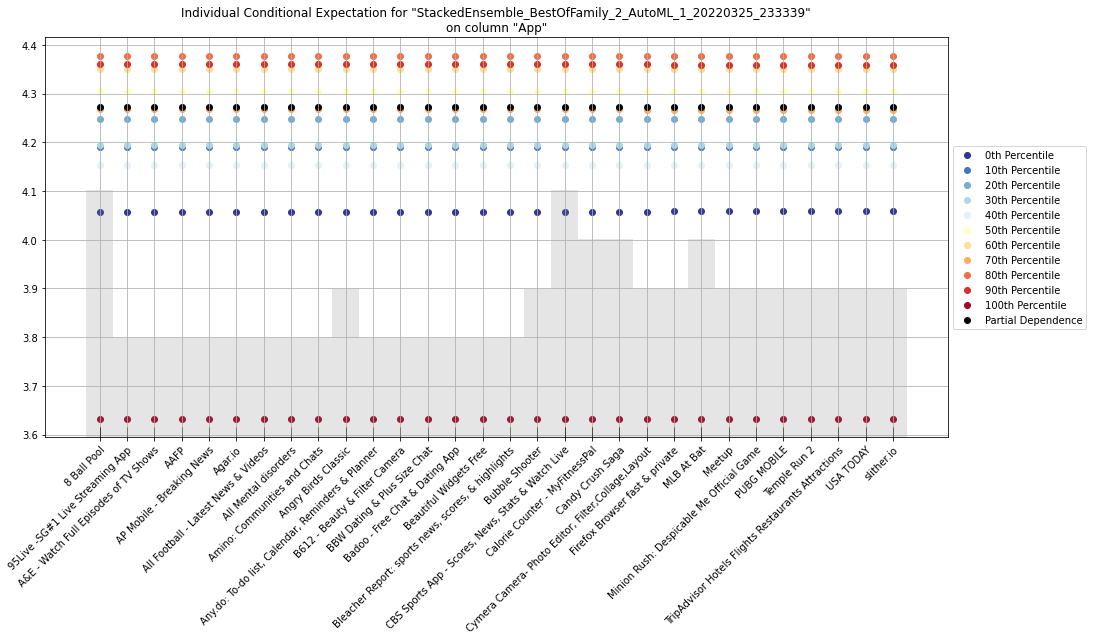

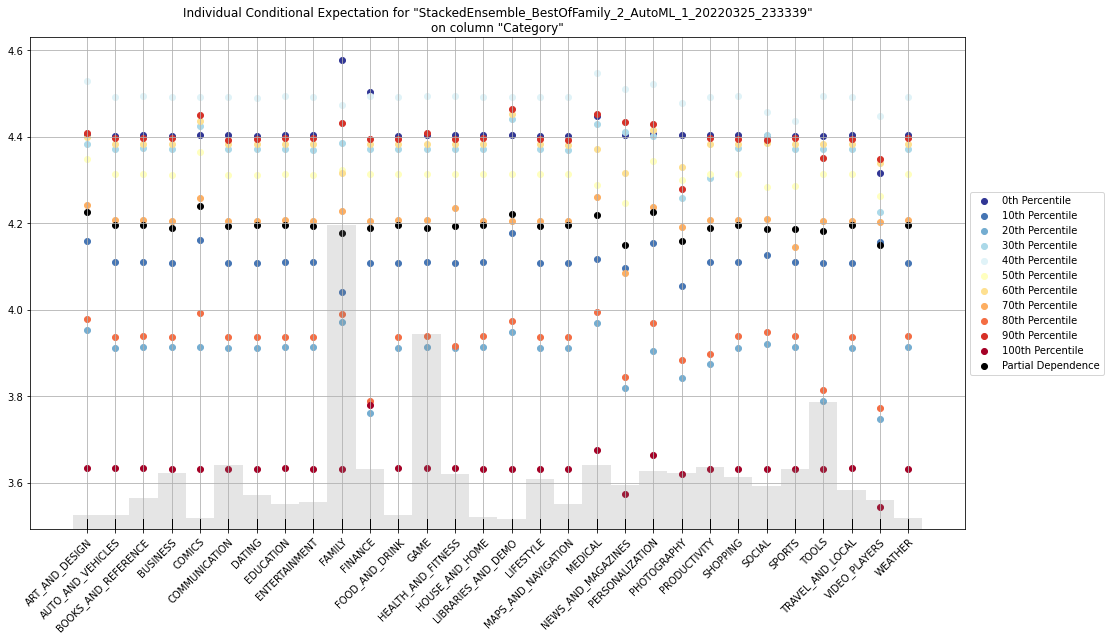

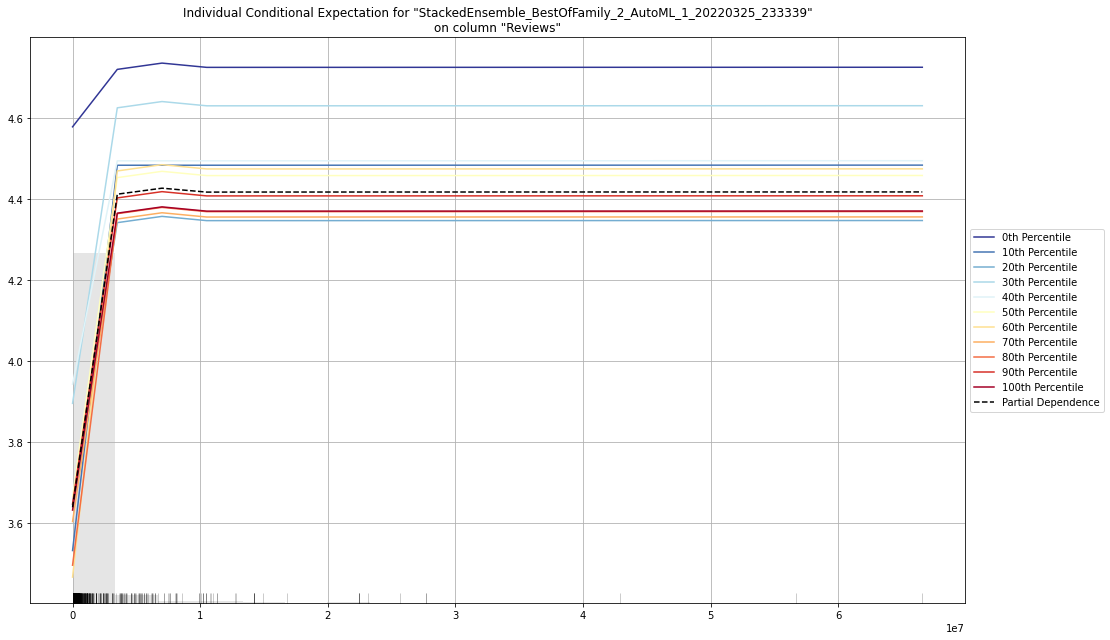

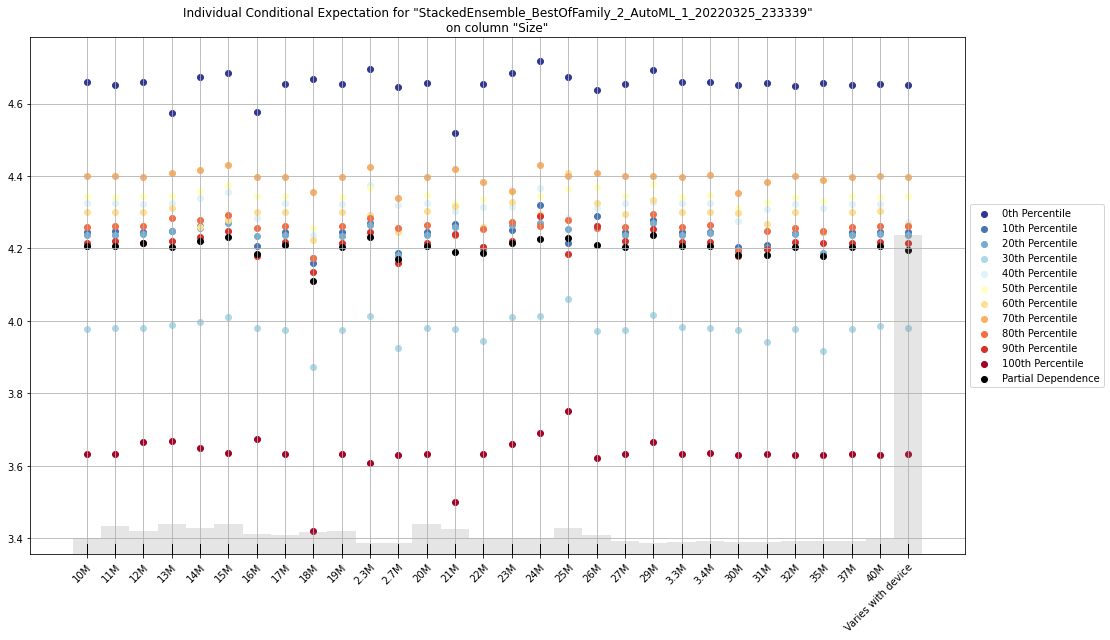

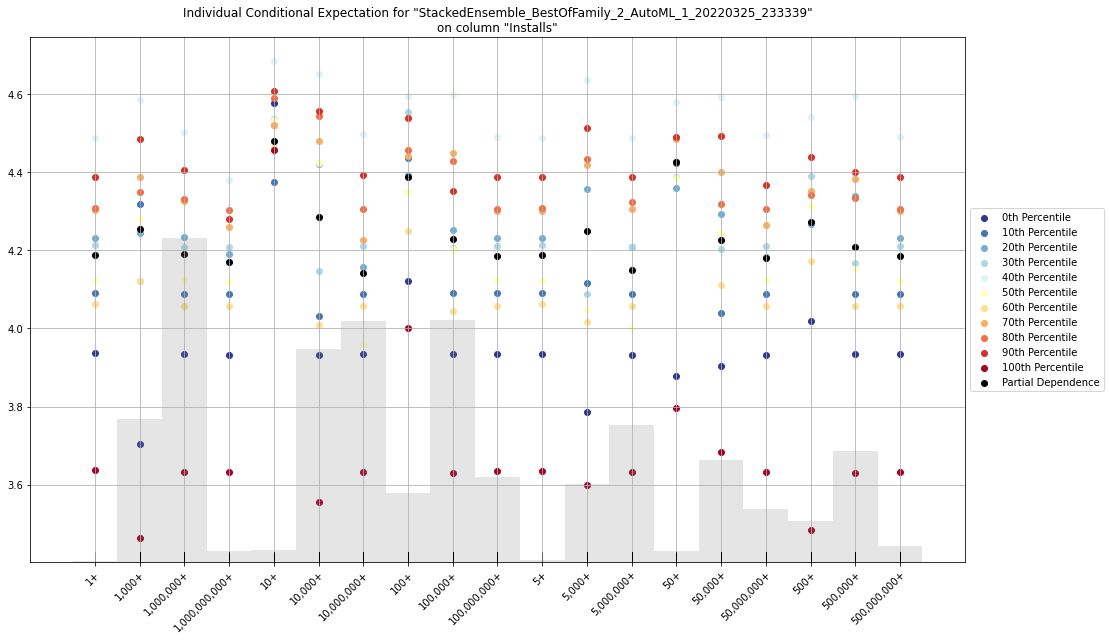

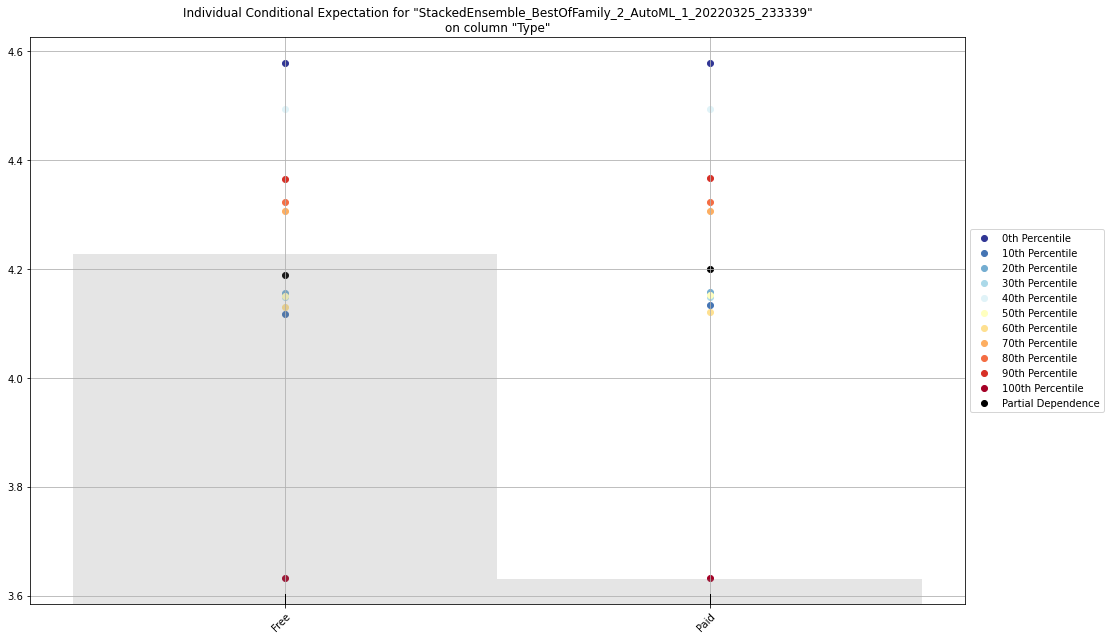

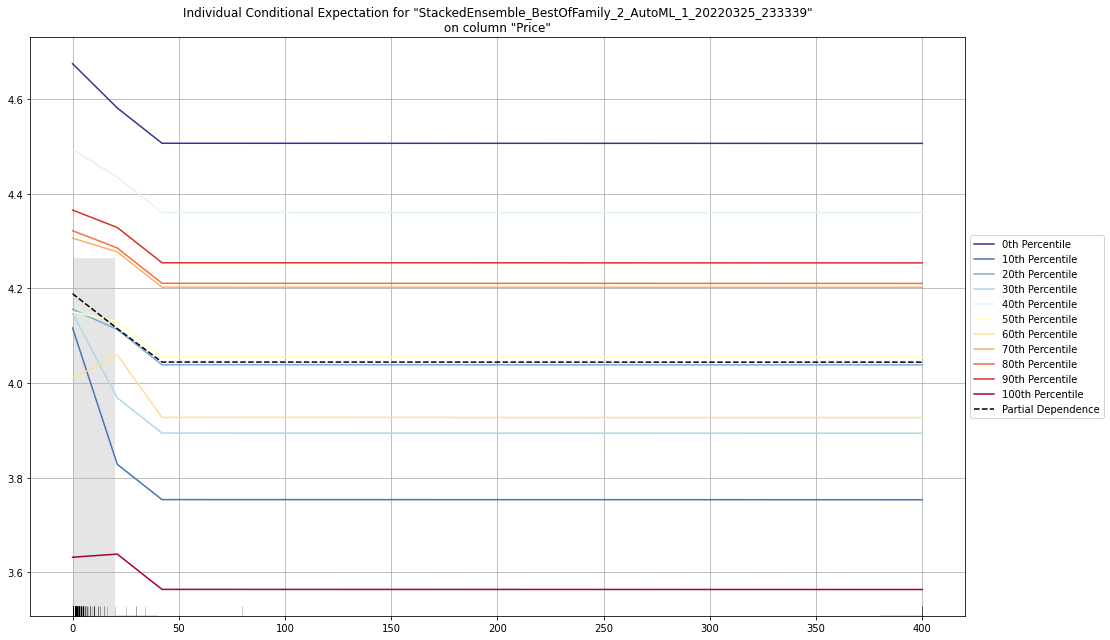

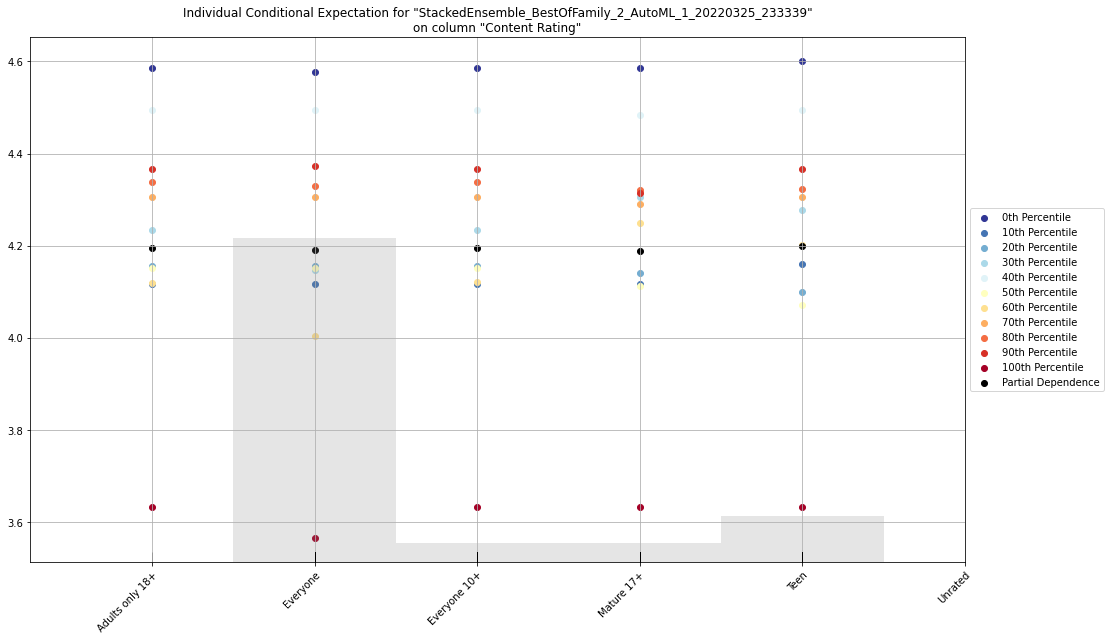

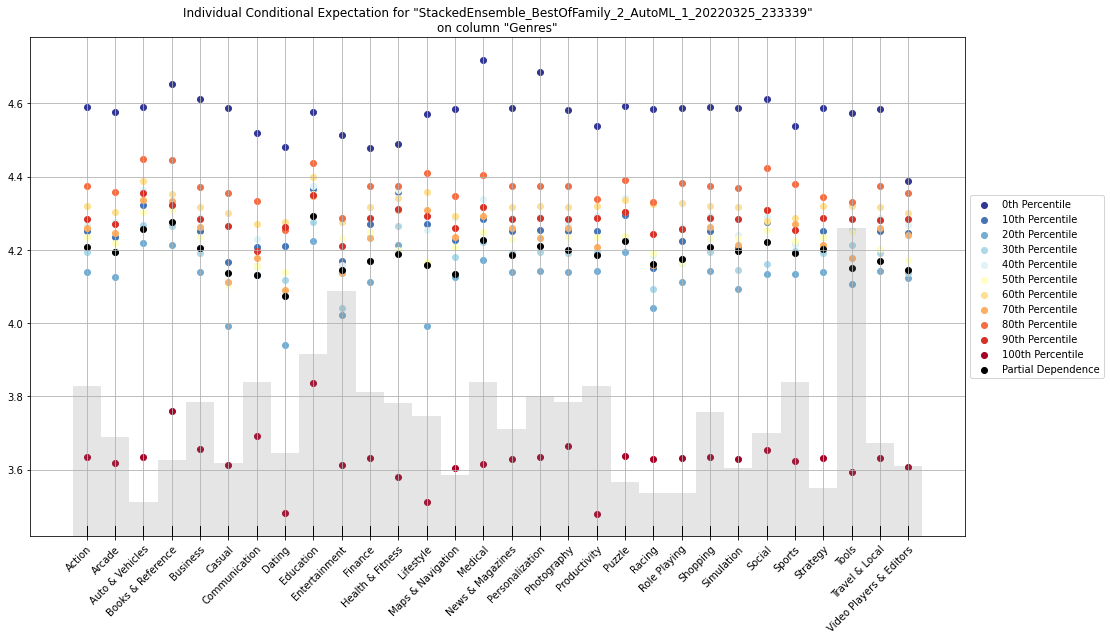

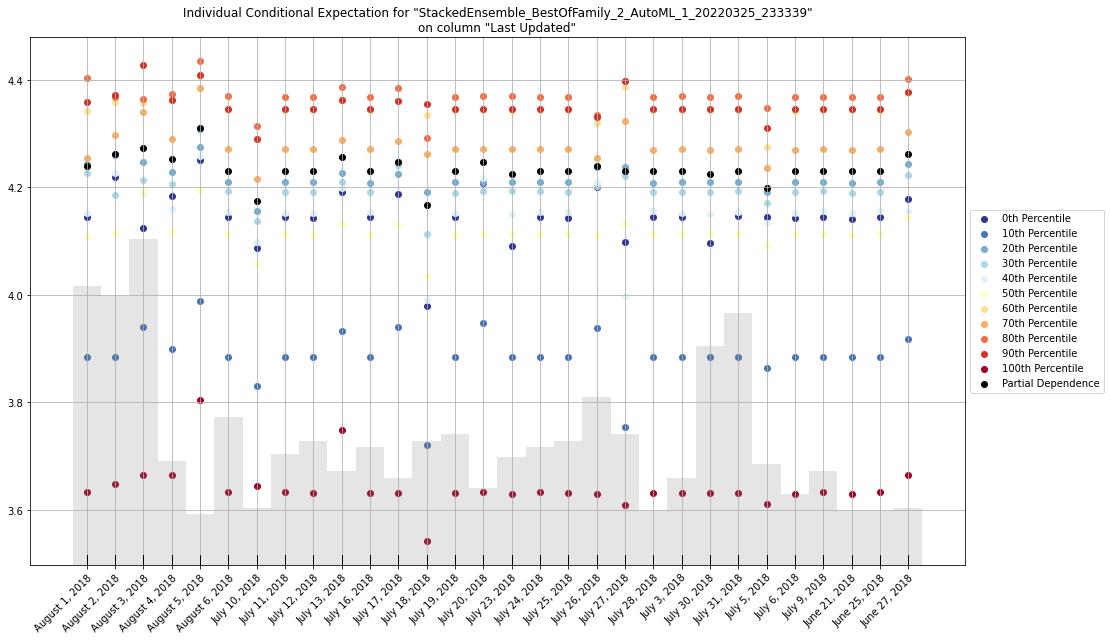

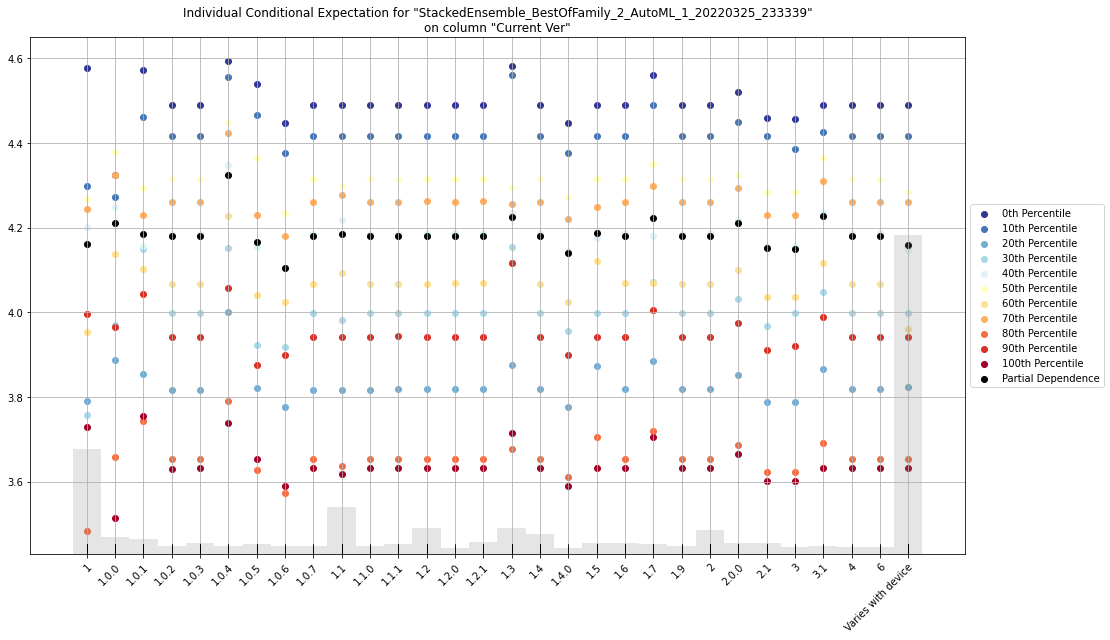

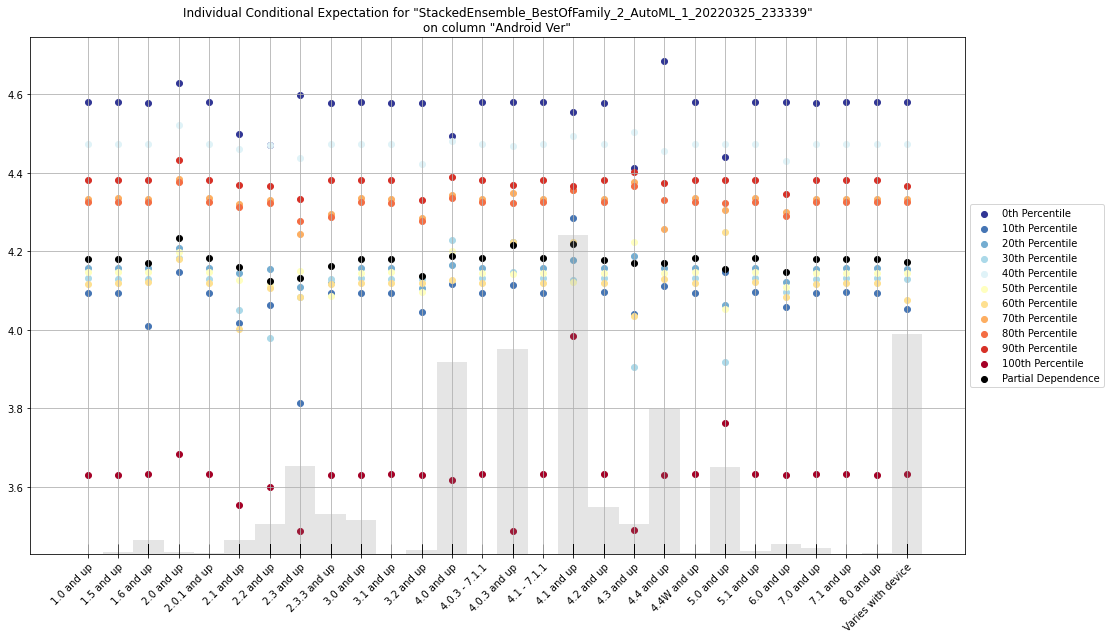

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [21]:
aml.leader.explain(test)